<a href="https://colab.research.google.com/github/erinmcmahon26/School_EDA/blob/main/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['housing_prices_train_data.csv']))

Saving housing_prices_train_data.csv to housing_prices_train_data (5).csv


In [3]:
df_test = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/School_EDA/main/housing_prices_test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## EDA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [7]:
pd.set_option("display.max_rows", None)

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.describe(include = "O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
df_train.fillna(0, inplace=True)

In [13]:
#df_test.fillna(0, inplace=True)

### Assessing Dependent Variable

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

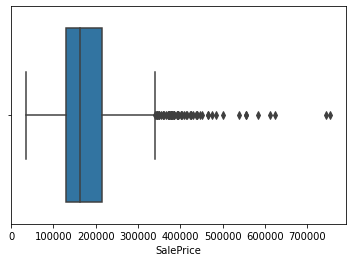

In [15]:
sns.boxplot(x='SalePrice', data=df_train)

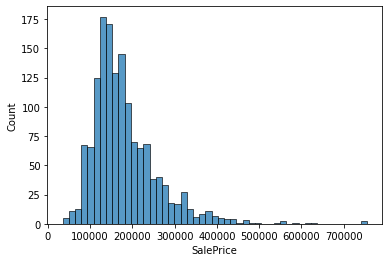

In [16]:
sns.histplot(x='SalePrice', data = df_train)

### Outlier Removal

In [17]:
# took out outliers based on boxplot outlier indications
outliers = df_train[df_train['SalePrice'] > 350000]
len(outliers)

54

In [18]:
# created new df excluding outliers
df_train2 = df_train[df_train['SalePrice'] <= 350000]

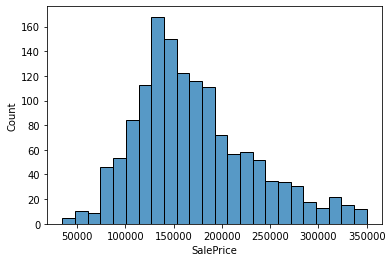

In [19]:
sns.histplot(x='SalePrice', data = df_train2)

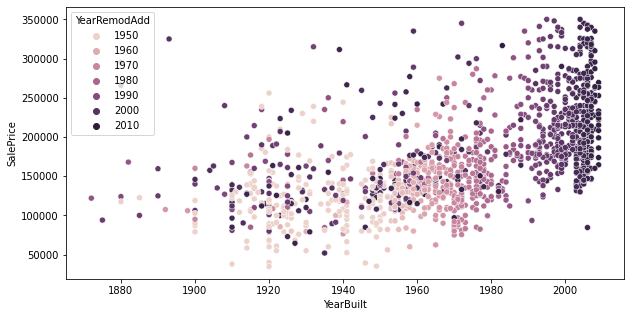

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_train2)

### Search For Features

In [21]:
# combine like features 
df_train2['TotalBath'] = df_train2['BsmtFullBath'] + 0.5*(df_train2['BsmtHalfBath']) +df_train2['FullBath'] + 0.5*(df_train2['HalfBath'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# combine like features for test
df_test['TotalBath'] = df_test['BsmtFullBath'] + 0.5*(df_test['BsmtHalfBath']) + df_test['FullBath'] + 0.5*(df_test['HalfBath'])

In [23]:
corr_matrix = df_train2.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.786782
GrLivArea        0.668598
TotalBath        0.640550
GarageCars       0.633250
GarageArea       0.613226
FullBath         0.581281
YearBuilt        0.563842
TotalBsmtSF      0.546806
YearRemodAdd     0.539863
1stFlrSF         0.525214
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
MasVnrArea       0.364205
2ndFlrSF         0.326451
OpenPorchSF      0.325439
WoodDeckSF       0.306803
BsmtFinSF1       0.303796
GarageYrBlt      0.302382
HalfBath         0.285982
LotArea          0.246926
BsmtUnfSF        0.213847
BsmtFullBath     0.209889
BedroomAbvGr     0.206744
LotFrontage      0.142587
ScreenPorch      0.102655
MoSold           0.074079
PoolArea         0.046710
3SsnPorch        0.040766
BsmtFinSF2       0.002779
MiscVal         -0.013894
Id              -0.016095
BsmtHalfBath    -0.021942
YrSold          -0.031760
OverallCond     -0.049012
LowQualFinSF    -0.058591
MSSubClass      -0.058979
EnclosedPorch   -0.139592
KitchenAbvGr

Text(0.5, 1.0, 'Correlation Housing Prices Features')

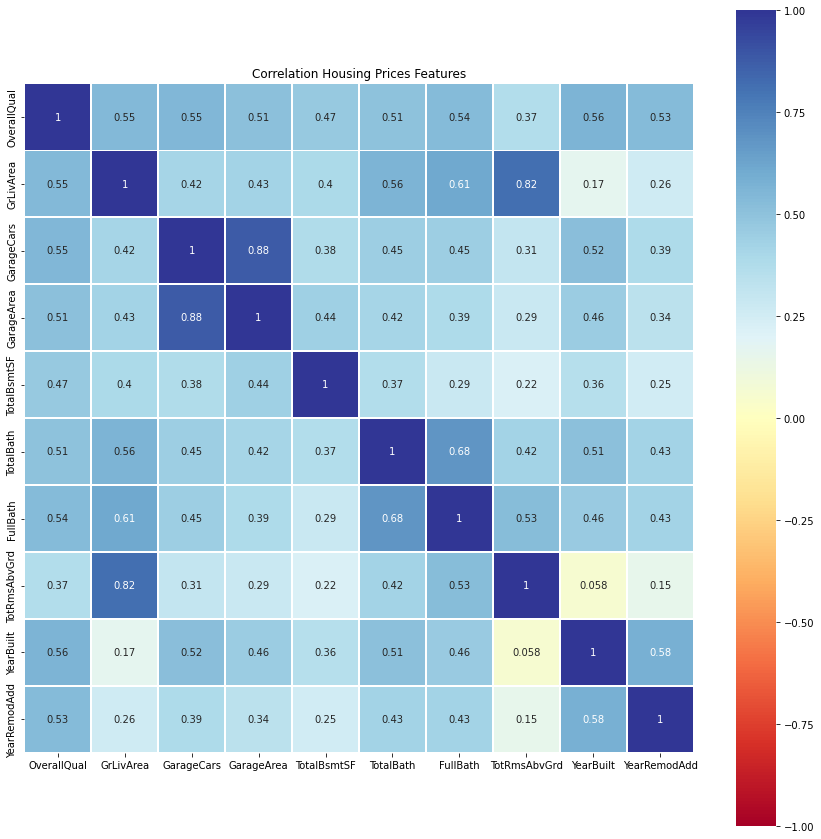

In [24]:
# pull out top 10 most correlated quantitative variables
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd']
df_train2_corr = df_train2[columns]
df_train2_corr.corr()

corrmat = df_train2_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

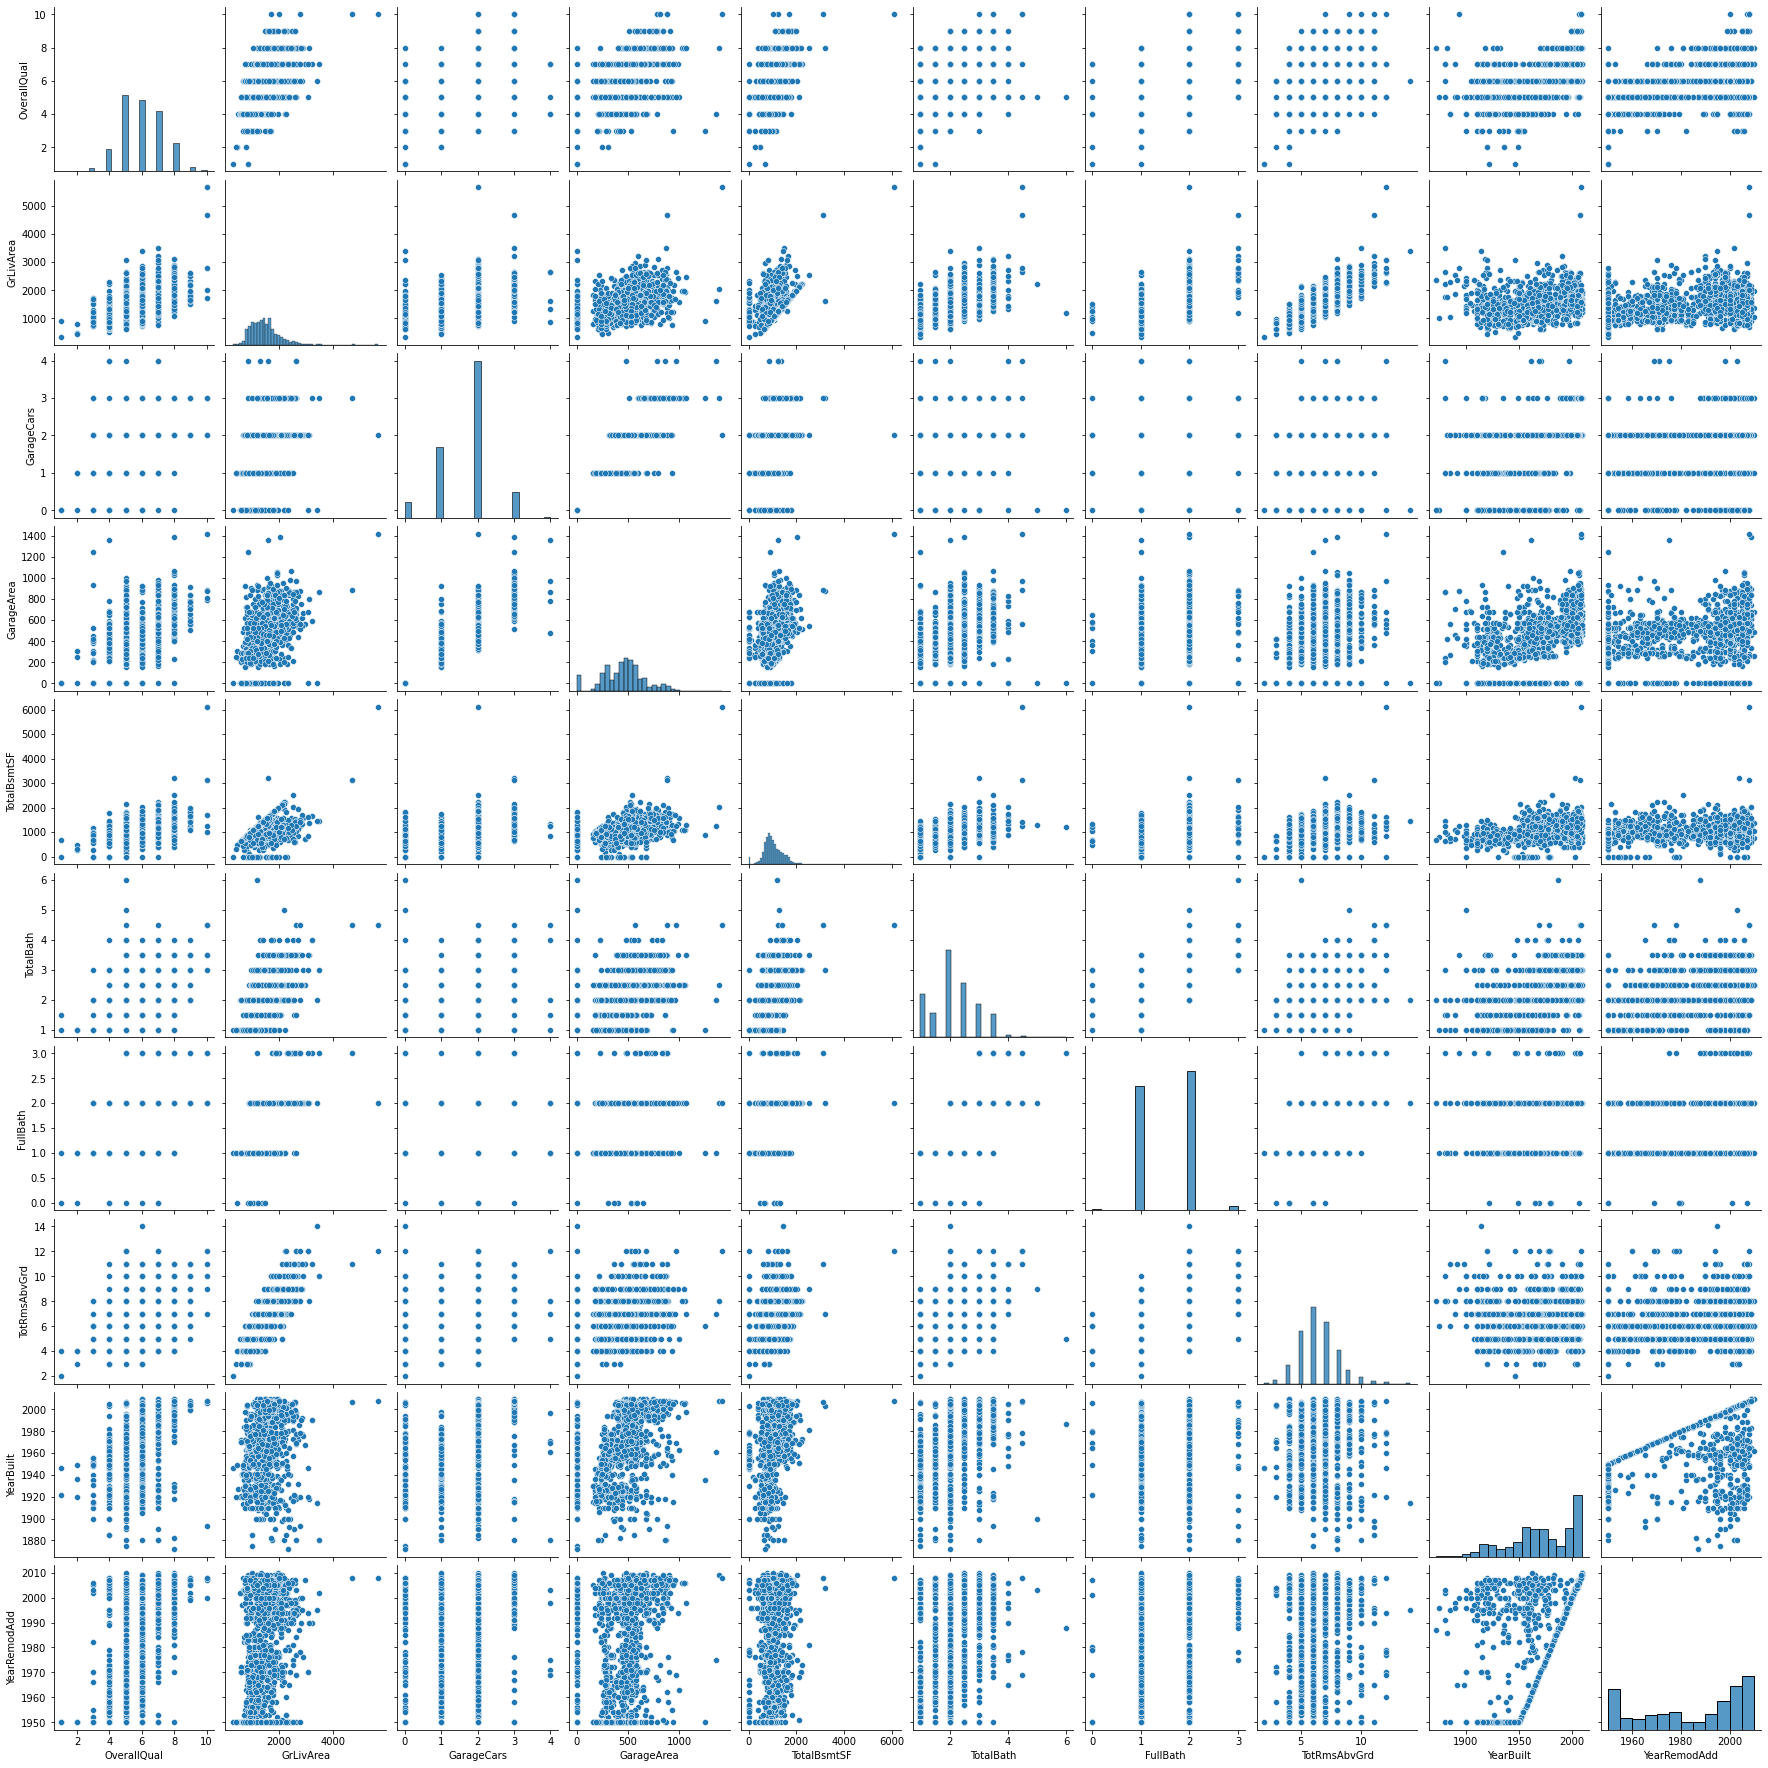

In [25]:
sns.pairplot(df_train2_corr)

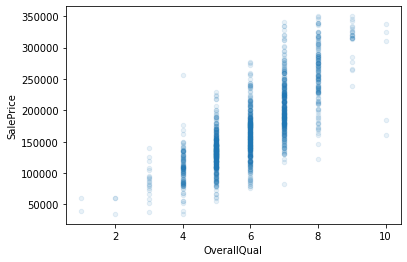

In [26]:
df_train2.plot(kind='scatter', x= 'OverallQual', y = 'SalePrice', alpha = 0.1)

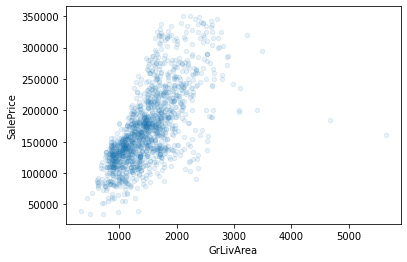

In [27]:
df_train2.plot(kind='scatter', x= 'GrLivArea', y = 'SalePrice', alpha = 0.1)

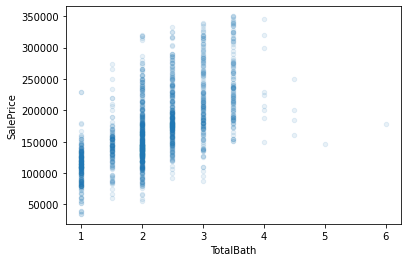

In [28]:
df_train2.plot(kind='scatter', x= 'TotalBath', y = 'SalePrice', alpha = 0.1)

In [29]:
df_train2[['SalePrice','OverallQual']].groupby('OverallQual').describe()

SalePrice                 ...                    
                count           mean  ...       75%       max
OverallQual                           ...                    
1                 2.0   50150.000000  ...   55575.0   61000.0
2                 3.0   51770.333333  ...   60000.0   60000.0
3                20.0   87473.750000  ...   97500.0  139600.0
4               116.0  108420.655172  ...  125500.0  256000.0
5               397.0  133523.347607  ...  147000.0  228950.0
6               374.0  161603.034759  ...  181000.0  277000.0
7               317.0  206632.709779  ...  230000.0  341000.0
8               149.0  258656.120805  ...  287090.0  350000.0
9                23.0  312765.956522  ...  327450.0  350000.0
10                5.0  263450.000000  ...  325000.0  337500.0

[10 rows x 8 columns]

In [30]:
df_train2[['SalePrice','TotalBath']].groupby('TotalBath').describe()

SalePrice                               ...                              
              count           mean           std  ...       50%       75%       max
TotalBath                                         ...                              
1.0           228.0  110869.671053  28375.647150  ...  112250.0  127500.0  230000.0
1.5           129.0  142692.372093  35599.840436  ...  142500.0  158000.0  274000.0
2.0           453.0  156603.075055  45812.050131  ...  145000.0  178000.0  320000.0
2.5           285.0  192929.936842  46335.213950  ...  181000.0  221000.0  333168.0
3.0           174.0  218264.902299  57631.885507  ...  209450.0  261600.0  340000.0
3.5           122.0  243525.745902  55015.915858  ...  235000.0  277750.0  350000.0
4.0             9.0  240408.222222  65989.395045  ...  225000.0  299800.0  345000.0
4.5             4.0  198687.500000  37972.234922  ...  192375.0  212500.0  250000.0
5.0             1.0  145900.000000           NaN  ...  145900.0  145900.0  145900.0
6.0             1.0  179000.000000           NaN  ...  179000.0  179000.0  179000.0

[10 rows x 8 columns]

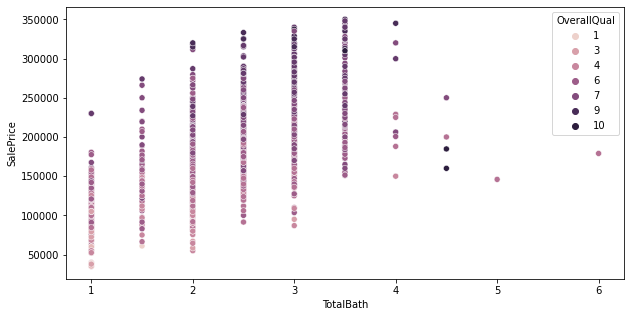

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBath', y='SalePrice', hue='OverallQual', data=df_train2)

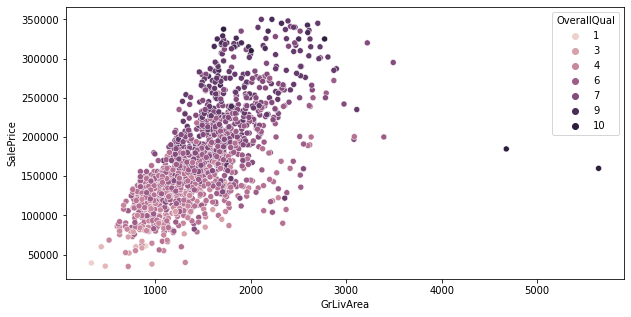

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df_train2)

#### Assess Categorical Variables

WHY???

In [33]:
df_train2_cat = df_train2.select_dtypes(include='object')

In [34]:
df_train2_cat['SalePrice'] = df_train2.loc[:,'SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_train2_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1406 non-null   object
 1   Street         1406 non-null   object
 2   Alley          1406 non-null   object
 3   LotShape       1406 non-null   object
 4   LandContour    1406 non-null   object
 5   Utilities      1406 non-null   object
 6   LotConfig      1406 non-null   object
 7   LandSlope      1406 non-null   object
 8   Neighborhood   1406 non-null   object
 9   Condition1     1406 non-null   object
 10  Condition2     1406 non-null   object
 11  BldgType       1406 non-null   object
 12  HouseStyle     1406 non-null   object
 13  RoofStyle      1406 non-null   object
 14  RoofMatl       1406 non-null   object
 15  Exterior1st    1406 non-null   object
 16  Exterior2nd    1406 non-null   object
 17  MasVnrType     1406 non-null   object
 18  ExterQual      1406 non-null

In [36]:
pip install dython

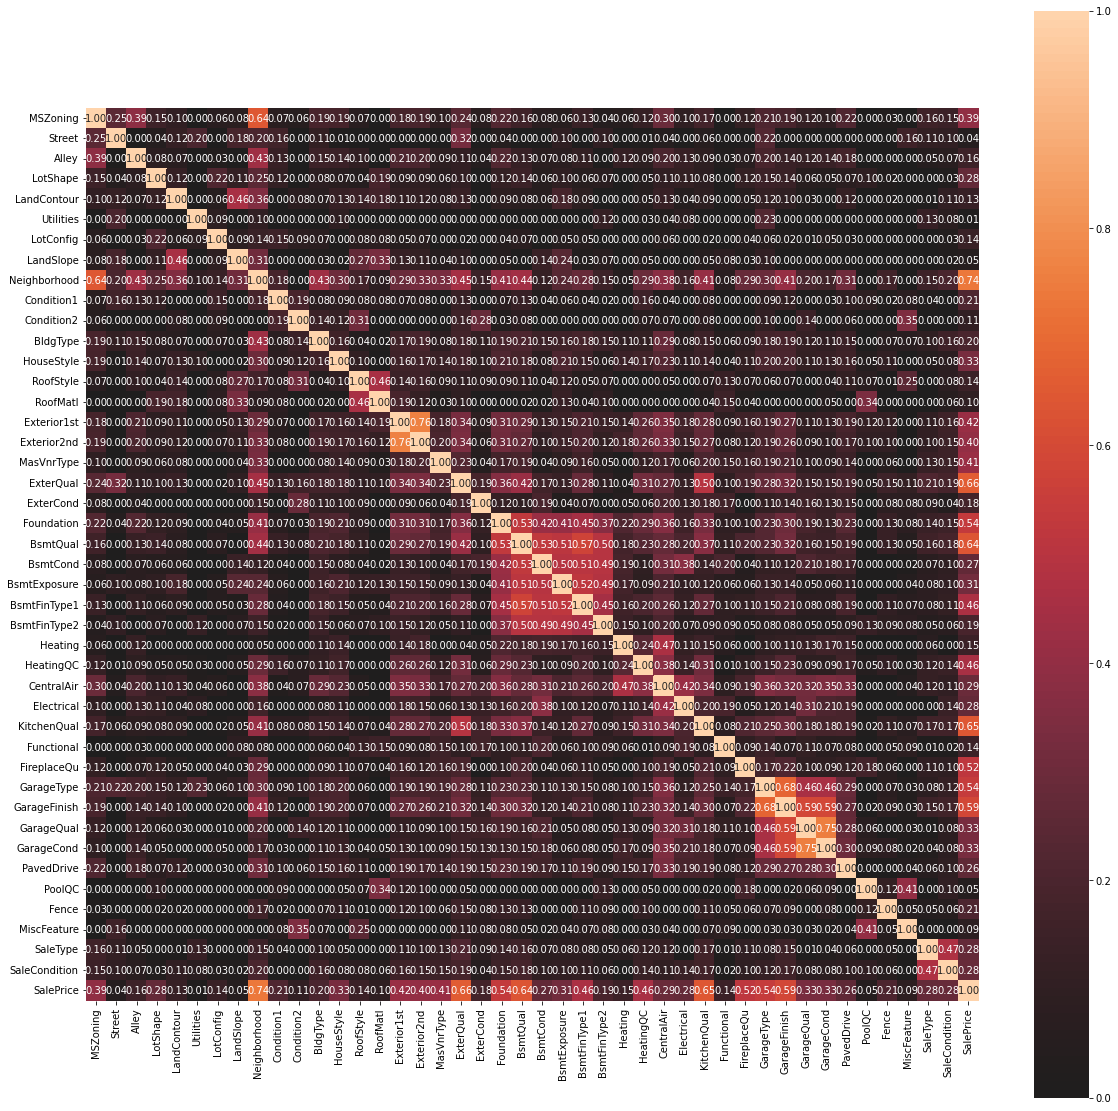

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbd593b3f50>,
 'corr':                MSZoning    Street     Alley  ...  SaleType  SaleCondition  SalePrice
 MSZoning       1.000000  0.249014  0.390464  ...  0.159376       0.145614   0.393303
 Street         0.249014  1.000000  0.000000  ...  0.109514       0.104600   0.044395
 Alley          0.390464  0.000000  1.000000  ...  0.049342       0.069369   0.156227
 LotShape       0.154713  0.041146  0.079783  ...  0.000000       0.027188   0.278998
 LandContour    0.103926  0.117259  0.069888  ...  0.011514       0.107909   0.130651
 Utilities      0.000000  0.201197  0.000000  ...  0.129918       0.075768   0.014860
 LotConfig      0.062523  0.000000  0.034462  ...  0.000000       0.034506   0.137562
 LandSlope      0.075151  0.182923  0.000000  ...  0.000000       0.024160   0.049486
 Neighborhood   0.641332  0.200445  0.430315  ...  0.154885       0.199718   0.736285
 Condition1     0.065694  0.164246  0.127453  ...  0.037595       

In [37]:
from dython.nominal import associations
associations(df_train2_cat, figsize=(20,20))

This correlation between sale price and the categorical variables shows that neighborhood and external quality could be considered good predictors.

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
neigh_cat_encoded = ordinal_encoder.fit_transform(df_train2[['Neighborhood']])
df_train2['Neigh_Code'] = neigh_cat_encoded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
extqual_cat_encoded = ordinal_encoder.fit_transform(df_train2[['ExterQual']])
df_train2['ExtQual_Code'] = extqual_cat_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
kitchqual_cat_encoded = ordinal_encoder.fit_transform(df_train2[['KitchenQual']])
df_train2['KitchQual_Code'] = kitchqual_cat_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
#make sure new columns added
df_train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,Neigh_Code,ExtQual_Code,KitchQual_Code
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,3.5,5.0,2.0,2.0
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500,2.5,24.0,3.0,3.0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500,3.5,5.0,2.0,2.0
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000,2.0,6.0,3.0,2.0
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000,3.5,15.0,2.0,2.0


In [42]:
# for test
neigh_cat_encoded = ordinal_encoder.fit_transform(df_test[['Neighborhood']])
df_test['Neigh_Code'] = neigh_cat_encoded

In [43]:
extqual_cat_encoded = ordinal_encoder.fit_transform(df_test[['ExterQual']])
df_test['ExtQual_Code'] = extqual_cat_encoded

In [44]:
#df_test.drop(df_test.index[df_test['KitchenQual'] == 0], inplace=True)

In [90]:
kitchqual_cat_encoded = ordinal_encoder.fit_transform(df_test[['KitchenQual']])
df_test['KitchQual_Code'] = kitchqual_cat_encoded

In [46]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,Neigh_Code,ExtQual_Code,KitchQual_Code
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1.0,12.0,3.0,3.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1.5,12.0,3.0,2.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2.5,8.0,3.0,3.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2.5,8.0,3.0,2.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.0,22.0,2.0,2.0


In [81]:
df_test['KitchQual_Code'].value_counts()

3.0    757
2.0    565
0.0    105
1.0     31
Name: KitchQual_Code, dtype: int64

In [84]:
df_test.loc[df_test['KitchQual_Code'] == 'NaN']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,Neigh_Code,ExtQual_Code,KitchQual_Code


In [87]:
df_test['KitchQual_Code'].isna().sum()

1

In [96]:
df_test.fillna(0, inplace=True)

#### Drop Features Not Used for Model

In [48]:
features = df_train2[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'Neigh_Code', 'ExtQual_Code', 'KitchQual_Code']]

In [97]:
test_features = df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'YearBuilt','YearRemodAdd', 'Neigh_Code', 'ExtQual_Code', 'KitchQual_Code']]

In [50]:
test_features.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
GarageArea        1
TotalBsmtSF       1
TotalBath         2
FullBath          0
YearBuilt         0
YearRemodAdd      0
Neigh_Code        0
ExtQual_Code      0
KitchQual_Code    1
dtype: int64

### Feature Scaling

In [51]:
# Min Max Scaling
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
sale_scaled = scaler.fit_transform(df_train2[['SalePrice']])
sale_scaled

array([[0.55093621],
       [0.46524913],
       [0.59854015],
       ...,
       [0.73500476],
       [0.3402888 ],
       [0.35734687]])

In [53]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [54]:
scaler_2 = StandardScaler()
standard_sale_scaled = scaler_2.fit_transform(df_train2[['SalePrice']])
standard_sale_scaled

array([[ 0.6195948 ],
       [ 0.17215093],
       [ 0.86817473],
       ...,
       [ 1.58077054],
       [-0.48037139],
       [-0.39129692]])

## Modeling

### Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [56]:
import statsmodels.api as sm

y = df_train2['SalePrice']
x = df_train2['OverallQual']
x = sm.add_constant(x)

lm = sm.OLS(y,x).fit()
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2281.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):          1.66e-296
Time:                        22:22:59   Log-Likelihood:                -16794.
No. Observations:                1406   AIC:                         3.359e+04
Df Residuals:                    1404   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.956e+04   4725.922    -10.487      0.000   -5.88e+04   -4.03e+04
OverallQual  3.681e+04    770.674     47.763      0.000    3.53e+04    3.83e+04
==============================================================================
Omnibus:                       36.969   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.539
Skew:                           0.229   Prob(JB):                     1.18e-13
Kurtosis:                       3.898   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y_pred = 36810 * x['OverallQual'] - 49560

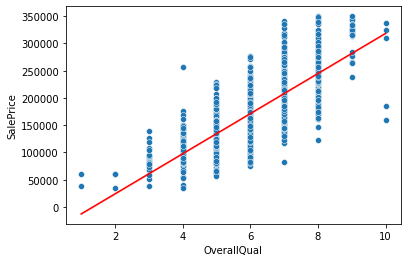

In [58]:
sns.scatterplot(x=x['OverallQual'], y=y)
sns.lineplot(x=x['OverallQual'], y=y_pred, color='red')

### Multiple Linear Regression Model

In [59]:
features = df_train2[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'YearBuilt','YearRemodAdd', 'Neigh_Code', 'ExtQual_Code', 'KitchQual_Code']]

In [60]:
y = df_train2['SalePrice']
x2 = features

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x2, y)

In [61]:
# look at summary statistics
x2 = sm.add_constant(x2)

mul_lm = sm.OLS(y,x2).fit()
mul_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     455.1
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:23:00   Log-Likelihood:                -16352.
No. Observations:                1406   AIC:                         3.273e+04
Df Residuals:                    1393   BIC:                         3.280e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.119e+05   1.02e+05     -7.966      0.000   -1.01e+06   -6.12e+05
OverallQual     1.421e+04    920.404     15.443      0.000    1.24e+04     1.6e+04
GrLivArea         34.8898      2.355     14.815      0.000      30.270      39.510
GarageCars      9526.7511   2249.364      4.235      0.000    5114.244    1.39e+04
GarageArea        13.8219      7.766      1.780      0.075      -1.413      29.057
TotalBsmtSF       15.1404      2.181      6.943      0.000      10.862      19.418
TotalBath       1.145e+04   1458.962      7.847      0.000    8586.889    1.43e+04
FullBath       -8109.3779   2120.561     -3.824      0.000   -1.23e+04   -3949.540
YearBuilt        194.5412     38.348      5.073      0.000     119.316     269.766
YearRemodAdd     220.0019     47.455      4.636      0.000     126.911     313.093
Neigh_Code       148.8603    124.431      1.196      0.232     -95.233     392.953
ExtQual_Code   -3234.3034   1677.076     -1.929      0.054   -6524.171      55.564
KitchQual_Code -7348.3219   1227.190     -5.988      0.000   -9755.661   -4940.982
==============================================================================
Omnibus:                      858.071   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50903.955
Skew:                          -2.092   Prob(JB):                         0.00
Kurtosis:                      32.179   Cond. No.                     4.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Decision Tree Model

In [62]:
from sklearn.tree import DecisionTreeRegressor

X = df_train2[['OverallQual']]
y = df_train2['SalePrice']

tree_reg = DecisionTreeRegressor(max_depth=10, random_state=0)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [63]:
from sklearn.metrics import mean_squared_error
predictions = tree_reg.predict(X)
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
rmse


35889.527189378765

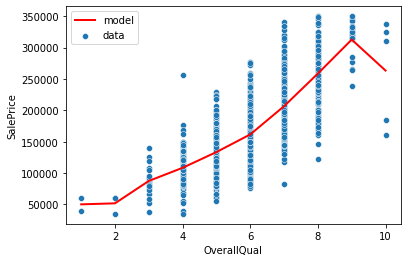

In [64]:
sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
plt.plot(df_train2['OverallQual'].sort_values(), tree_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

RandomForestRegressor()

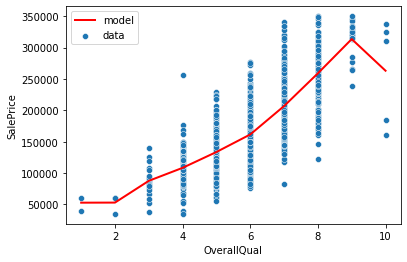

In [66]:
sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
plt.plot(df_train2['OverallQual'].sort_values(), forest_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()

### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [68]:
# linear regression scores
lin_scores = cross_val_score(lin_reg, x, y,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [35710.91013047 38533.01599977 40764.05074441 39723.88160059
 41068.80563347 32707.32082215 31848.44152987 36779.49122965
 37964.38172998 36569.79045718]
Mean: 37167.00898775352
Standard deviation: 2966.5661070603524


In [69]:
# multiple linear regression
ml_scores = cross_val_score(lin_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

ml_rmse_scores = np.sqrt(-ml_scores)
display_scores(ml_rmse_scores)

Scores: [23791.95838868 26753.51536259 23459.50807208 33875.00536779
 28652.22095623 20579.34999984 22878.3649078  25332.93380521
 45199.98241109 25213.14485533]
Mean: 27573.59841266513
Standard deviation: 6819.21324846846


In [70]:
# Decision Tree Scores
scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [35548.52318178 37347.90838699 38175.80425198 37932.40012451
 39239.33249641 31862.4292401  32414.55559137 35509.07710892
 35903.45939102 36702.08296679]
Mean: 36063.55727398757
Standard deviation: 2272.8838892423987


In [71]:
# Random Forest Scores
forest_scores = cross_val_score(forest_reg, X, y,
                              scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [35550.4870161  37330.81882202 38173.89857775 37909.64102485
 39220.62837544 31872.44048584 32419.0507032  35507.90837663
 35937.90322893 36700.81260213]
Mean: 36062.358921288695
Standard deviation: 2264.428387014468


## Generate Submission

In [98]:
test_features.isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
TotalBath         0
FullBath          0
YearBuilt         0
YearRemodAdd      0
Neigh_Code        0
ExtQual_Code      0
KitchQual_Code    0
dtype: int64

In [99]:
x = test_features
test_preds = lin_reg.predict(x)

In [102]:
from google.colab import files
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
output = pd.DataFrame({'Id': df_test.Id,
                       'SalePrice': test_preds})
output.to_csv('submission2.csv', index=False)

## Conclusions

Talk about model here. 